# CSE381 Introduction to Machine Learning – Spring 2023
**Project Description**

The data used in this project will help to identify whether a person is going to recover from
coronavirus symptoms or not based on some pre‐defined standard symptoms. These
symptoms are based on guidelines given by the World Health Organization (WHO).
This dataset has daily level information on the number of affected cases, deaths and
recovery from 2019 novel coronavirus. Please note that this is a time series data and so the
number of cases on any given day is the cumulative number

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import roc_curve
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,  PolynomialFeatures   
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
#pip install tensorflow before importing
import tensorflow
from sklearn.metrics import confusion_matrix
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, LeakyReLU
# from tensorflow.keras.activations import linear, relu, sigmoid


In [3]:
data= pd.read_csv("C:\\Users\\HP\\Desktop\\data.csv")
# Split the inputs and outputs into separate arrays
# x = data[ :, 0]
# y = data[:,1]
#training_data = data[:70]
feature_cols=['location',	'country' ,	'gender' ,	'age' ,	'vis_wuhan',	'from_wuhan',	'symptom1'	,'symptom2'	,'symptom3'	,'symptom4'	,'symptom5'	,'symptom6', 	'diff_sym_hos'
]
x=data[feature_cols]
y=data.result
# Convert 1-D arrays into 2-D because the commands later will require it
# x = np.expand_dims(x, axis=1)
# y = np.expand_dims(y, axis=1)
# Get 70% of the dataset as the training set. Put the remaining 30% in temporary variables: x_test and y_test.
x_train, x_both, y_train, y_both = train_test_split(x, y, test_size=0.40, random_state=3)
# Split the 30% subset above into two: one half for cross validation and the other for the test set
x_cv, x_test, y_cv, y_test = train_test_split(x_both, y_both, test_size=0.50, random_state=3)
#another approach to divide data 
#train, validate, test = np.split(df.sample(frac=1, random_state=42), #60 training 20 validation 20 test 
                      # [int(.6*len(df)), int(.8*len(df))]) 


In [10]:
data.describe()

,Unnamed: 0,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
count,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.00000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000
mean,431.000000,76.645423,16.995365,0.849363,49.400000,0.181924,0.107764,12.13905,28.002317,18.298957,11.840093,2.993048,0.998841,0.995365,0.125145
std,249.270937,39.200264,7.809951,0.726062,15.079203,0.386005,0.310261,3.99787,7.473231,2.864064,1.183771,0.127251,0.034040,2.358767,0.331075
min,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,0.000000
25%,215.500000,45.000000,11.000000,0.000000,40.000000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,0.000000,0.000000
50%,431.000000,87.000000,18.000000,1.000000,49.400000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,0.000000,0.000000
75%,646.500000,110.000000,24.000000,1.000000,57.000000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,1.000000,0.000000
max,862.000000,138.000000,33.000000,2.000000,96.000000,1.000000,1.000000,24.00000,31.000000,19.000000,12.000000,3.000000,1.000000,15.000000,1.000000


In [61]:
# sc = StandardScaler()
# x_train = sc.fit_transform(x_train)
# x_test = sc.transform(x_test)

In [59]:
# kf = KFold(n_splits=2) # Define the split - into 2 folds 
# kf.get_n_splits(x_train) # returns the number of splitting iterations in the cross-validator
# KFold(n_splits=2, random_state=None, shuffle=False)

In [60]:
#for train_index, test_index in kf.split(x_train):
 #X_train, X_test = x_train[train_index], x_test[test_index]
 #Y_train, Y_test = y_train[train_index], y_test[test_index]

In [4]:
model = SVC()
model.fit(x_train, y_train)
# print prediction results
predictions = model.predict(x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       149
           1       0.73      0.33      0.46        24

    accuracy                           0.89       173
   macro avg       0.81      0.66      0.70       173
weighted avg       0.88      0.89      0.87       173



1.Apply SVM classifier  Algorithm and tune hyperparameters

In [5]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.856 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.856 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.864 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.864 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.864 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.856 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.856 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.864 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.864 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.864 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.856 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [7]:
grid_predictions = grid.predict(x_test)
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       149
           1       0.73      0.67      0.70        24

    accuracy                           0.92       173
   macro avg       0.84      0.81      0.82       173
weighted avg       0.92      0.92      0.92       173



In [8]:
param_dist = {
          'rbf_svm__C': [1, 10, 100, 1000], 
          'rbf_svm__gamma': [0.001, 0.0001], 
          'rbf_svm__kernel': ['rbf', 'linear'],
}
# create pipeline with a scaler 
steps = [('scaler', StandardScaler()), ('rbf_svm', SVC())]
pipeline = Pipeline(steps)
# do search
search = RandomizedSearchCV(pipeline, 
param_distributions=param_dist, n_iter=50)
search.fit(x_train, y_train)

print(classification_report(y_test, predictions))

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 16 is smaller than n_iter=50. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.90      0.98      0.94       149
           1       0.73      0.33      0.46        24

    accuracy                           0.89       173
   macro avg       0.81      0.66      0.70       173
weighted avg       0.88      0.89      0.87       173



**KNN**

supervised learning algorithm 


We will try to predict using the cross-validation dataset and calculate the accuracy between the expected output and the original output by random number of neighbors 

In [98]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_cv)
print(confusion_matrix(y_cv, y_pred))
print(classification_report(y_cv, y_pred))

[[114   2]
 [  7   6]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       116
           1       0.75      0.46      0.57        13

    accuracy                           0.93       129
   macro avg       0.85      0.72      0.77       129
weighted avg       0.92      0.93      0.92       129



In [69]:


# acc=np.zeros(20)
# #compare with validation data set to make sure of it
# # matrix=confusion_matrix(y_cv,y_prediction)
# # print(matrix)
# scaler = preprocessing.StandardScaler()
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)
# for i in range(1,21):
#     #Train Model and Predict  
#     knn = KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
#     yhat= knn.predict(x_cv)
#     acc[i-1] = metrics.accuracy_score(y_cv, yhat)

# acc

we define a range of k values from 1 to 30, and we use 10-fold cross-validation to evaluate the accuracy of the model for each value of k. We store the cross-validation scores in a list, and we find the optimal k by selecting the value that gives the highest cross-validation score.

In [101]:
from sklearn.model_selection import cross_val_score
neighbors=[]
k_range=range(1,31)
cv_scores=[]
for k in k_range:
    neighbors.append(k)
    knn2=KNeighborsClassifier ( n_neighbors=k)
    scores=cross_val_score(knn2,x_train,y_train,cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    

scores=cross_val_score(knn2,x_train,y_train,cv=10, scoring='accuracy')
print(scores)

[0.95081967 0.90163934 0.8852459  0.91803279 0.93333333 0.91666667
 0.91666667 0.95       0.93333333 0.9       ]


In [102]:
optimal_k=k_range[np.argmax(cv_scores)]
print(f" The optimal number of neigbors is {optimal_k} ")

 The optimal number of neigbors is 1 


Also we tried to determine the best k using the MeanSquared Error by finding the k that gives the minimum MSE

1


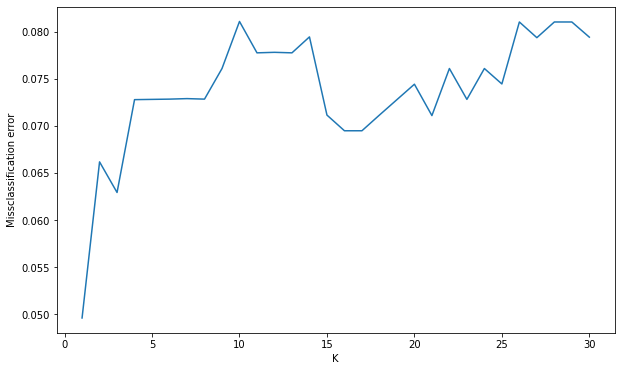

In [103]:

MSE=[1-x for x in cv_scores]

optimal_k =neighbors[MSE.index(min(MSE))]
print(optimal_k)
plt.figure(figsize=(10,6))
plt.plot(neighbors,MSE)
plt.xlabel("K")
plt.ylabel("Missclassification error")
plt.show()

Minimum error:- 0.06976744186046512 at K = 1


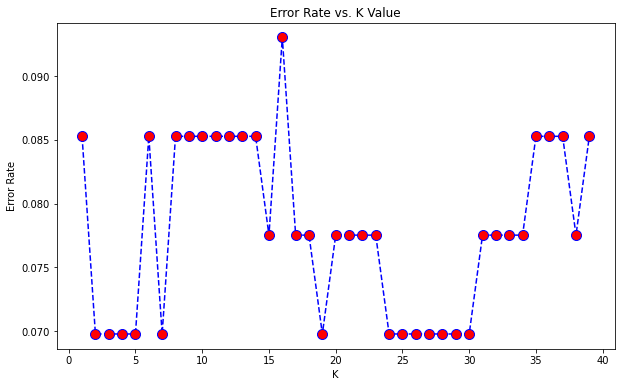

In [43]:
error_rate = []
for i in range(1,40):
 knn6 = KNeighborsClassifier(n_neighbors=i)
 knn6.fit(x_train,y_train)
 pred_i = knn6.predict(x_cv)
 error_rate.append(np.mean(pred_i != y_cv))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.9302325581395349 at K = 1


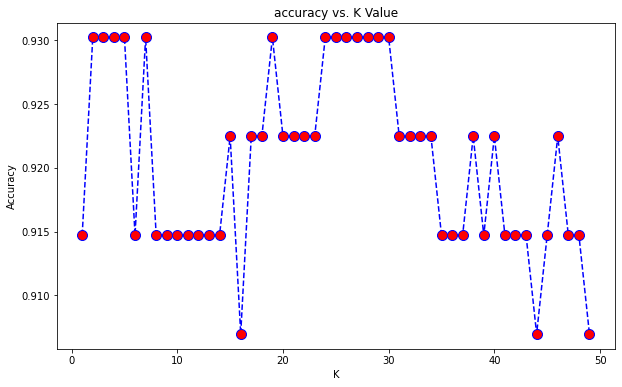

In [104]:
acc = []
from sklearn import metrics
for i in range(1,50):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
    yhat = neigh.predict(x_cv)
    acc.append(metrics.accuracy_score(y_cv, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,50),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [105]:
knn3 = KNeighborsClassifier(n_neighbors=1, algorithm = 'brute')
knn3.fit(x_train, y_train)
y_pred = knn3.predict(x_cv)
print(confusion_matrix(y_cv, y_pred))
print(classification_report(y_cv, y_pred))

[[112   4]
 [  7   6]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       116
           1       0.60      0.46      0.52        13

    accuracy                           0.91       129
   macro avg       0.77      0.71      0.74       129
weighted avg       0.91      0.91      0.91       129



confusion matrix

In [39]:
pd.crosstab(y_cv, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,112,4,116
1,7,6,13
All,119,10,129


Applying Roc curve

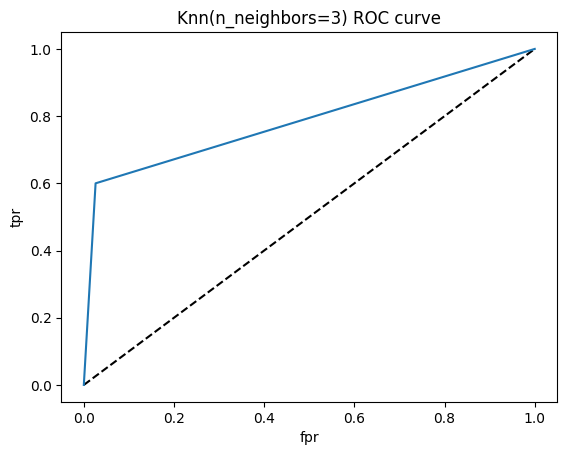

In [76]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=3) ROC curve')
plt.show()

In [77]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.7869565217391306

Tunning hyperparameter k

In [41]:
knn4 = KNeighborsClassifier()

# Set the hyperparameters to tune over
param_grid = {'n_neighbors': [3, 5, 7, 9, 11,13,15,17,19,21,23], 'weights': ['uniform', 'distance'], 'metric' : ['minkowski','euclidean','manhattan']}

# Create a grid search object to find the best hyperparameters
grid_search = GridSearchCV(knn4, param_grid, cv=5)

# Fit the grid search object to the training data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Evaluate the model with the best hyperparameters on the test data
print("Test set accuracy:", grid_search.score(x_cv, y_cv))

Best hyperparameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Test set accuracy: 0.9224806201550387


Bayesian Classifier 

In [79]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
# making predictions on the testing set
y_pred = gnb.predict(x_test)
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 32.30769230769231


In [87]:
# define the search
from skopt import BayesSearchCV
params = {'var_smoothing': np.logspace(0,-9, num=100)}

search = BayesSearchCV(
    estimator=gnb,
    search_spaces=params,
    n_jobs=1,
    cv=5,
    n_iter=30,
    scoring="accuracy",
    verbose=4,
    random_state=42
)


In [88]:
# perform the search
search.fit(x_train,y_train)
print(search.best_score_)
print(search.best_params_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END var_smoothing=5.336699231206313e-06;, score=0.876 total time=   0.0s
[CV 2/5] END var_smoothing=5.336699231206313e-06;, score=0.860 total time=   0.0s
[CV 3/5] END var_smoothing=5.336699231206313e-06;, score=0.876 total time=   0.0s
[CV 4/5] END var_smoothing=5.336699231206313e-06;, score=0.876 total time=   0.0s
[CV 5/5] END var_smoothing=5.336699231206313e-06;, score=0.858 total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END .var_smoothing=0.03511191734215131;, score=0.909 total time=   0.0s
[CV 2/5] END .var_smoothing=0.03511191734215131;, score=0.901 total time=   0.0s
[CV 3/5] END .var_smoothing=0.03511191734215131;, score=0.917 total time=   0.0s
[CV 4/5] END .var_smoothing=0.03511191734215131;, score=0.934 total time=   0.0s
[CV 5/5] END .var_smoothing=0.03511191734215131;, score=0.900 total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5]

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END .var_smoothing=0.01519911082952933;, score=0.926 total time=   0.0s
[CV 2/5] END .var_smoothing=0.01519911082952933;, score=0.901 total time=   0.0s
[CV 3/5] END .var_smoothing=0.01519911082952933;, score=0.901 total time=   0.0s
[CV 4/5] END .var_smoothing=0.01519911082952933;, score=0.926 total time=   0.0s
[CV 5/5] END .var_smoothing=0.01519911082952933;, score=0.908 total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ...............var_smoothing=1e-07;, score=0.752 total time=   0.0s
[CV 2/5] END ...............var_smoothing=1e-07;, score=0.810 total time=   0.0s
[CV 3/5] END ...............var_smoothing=1e-07;, score=0.777 total time=   0.0s
[CV 4/5] END ...............var_smoothing=1e-07;, score=0.802 total time=   0.0s
[CV 5/5] END ...............var_smoothing=1e-07;, score=0.708 total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END 

In [91]:
search.best_params_

OrderedDict([('var_smoothing', 0.012328467394420659)])

In [100]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.24      0.39       115
           1       0.14      0.93      0.24        15

    accuracy                           0.32       130
   macro avg       0.55      0.59      0.32       130
weighted avg       0.87      0.32      0.37       130



In [92]:
from sklearn.model_selection import RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)

In [94]:
from sklearn.preprocessing import PowerTransformer
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=gnb, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

Data_transformed = PowerTransformer().fit_transform(x_test)

gs_NB.fit(Data_transformed, y_test)

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


Fitting 15 folds for each of 100 candidates, totalling 1500 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=999),
             estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [95]:
gs_NB.best_params_

{'var_smoothing': 0.08111308307896872}

In [96]:
gs_NB.best_score_

0.8897435897435899

In [97]:
results_NB = pd.DataFrame(gs_NB.cv_results_['params'])
results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']

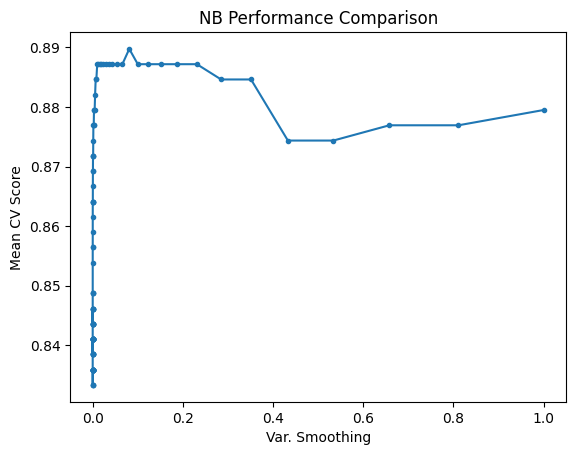

In [98]:
plt.plot(results_NB['var_smoothing'], results_NB['test_score'], marker = '.')    
plt.xlabel('Var. Smoothing')
plt.ylabel("Mean CV Score")
plt.title("NB Performance Comparison")
plt.show()